# SMS SPAM CLASSIFIER PROJECT 


## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("data/spam.csv", encoding ='ISO-8859-1' )

In [3]:
df = df1.copy()

In [4]:
df.shape # 5572 lignes et 5 variables 

(5572, 5)

## 2. Cleaning data 


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], axis = 1, inplace= True)

In [7]:
df.rename(columns = {"v1" : "target", "v2" : "text"}, inplace=True)

### Checking missing and duplicated values 

In [8]:
df.isna().sum() # Aucune valeurs manquantes 

target    0
text      0
dtype: int64

In [9]:
 df.duplicated().sum() #403 valeurs dupliquées 

403

In [10]:
df.drop_duplicates(inplace=True)

## 3. EDA

In [11]:
df['target'].replace({"ham" : 0, "spam" : 1}, inplace = True)

C:\Users\fares\AppData\Local\Temp\ipykernel_25976\3754090068.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['target'].replace({"ham" : 0, "spam" : 1}, inplace = True)
C:\Users\fares\AppData\Local\Temp\ipykernel_25976\3754090068.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target']

([<matplotlib.patches.Wedge at 0x2a22b0f0170>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37%'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63%')])

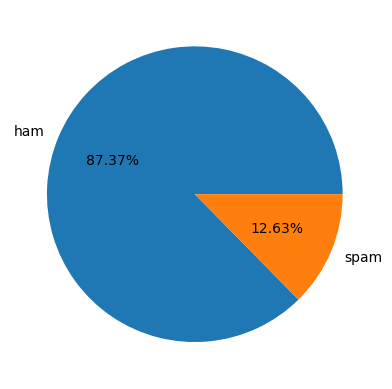

In [12]:
plt.pie(df['target'].value_counts(), autopct = '%1.2f%%', labels = ['ham', 'spam']) 

In [13]:
# Données déséquilibrées , il y a beaucoup plus de sms normaux que de spam

In [14]:
#!pip install nltk

In [15]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
#Punkt est un segmenter de phrases basé sur des modèles statistiques. Il est utilisé pour diviser un texte en phrases ou en mots

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fares\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\fares\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Tokenisons les sms en créants des variables contenant le nombre de mot , de caractères etc ..


**Nombre de caractères**

In [16]:
df['num_characters'] = df['text'].apply(len)

In [17]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


**Nombre de mots**

In [18]:
df["num_words"] = df["text"].apply(lambda x :len(nltk.word_tokenize(x))) # prend un texte (x) en entrée et le divise en mots (appelés "tokens")

**Nombre de phrases**

In [19]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # prend un texte (x) en entrée et le divise en phrases.

In [20]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


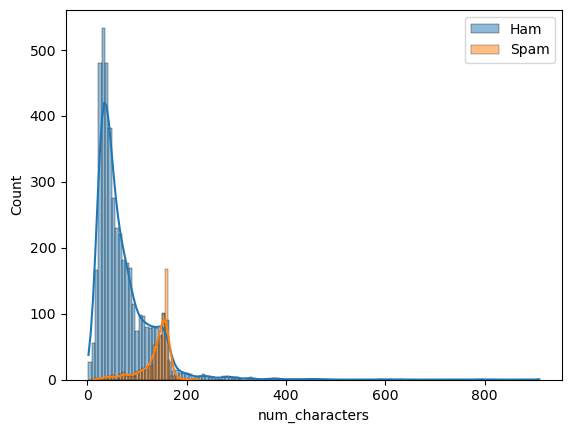

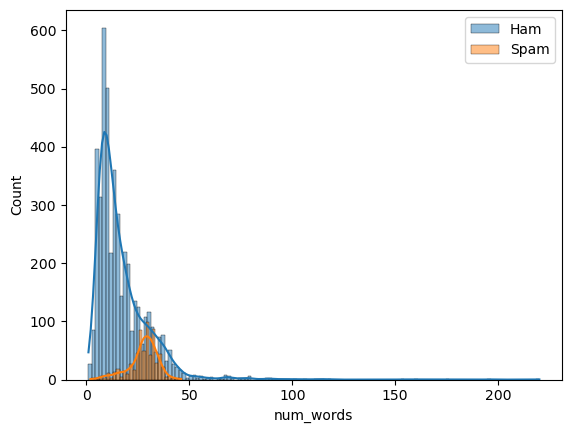

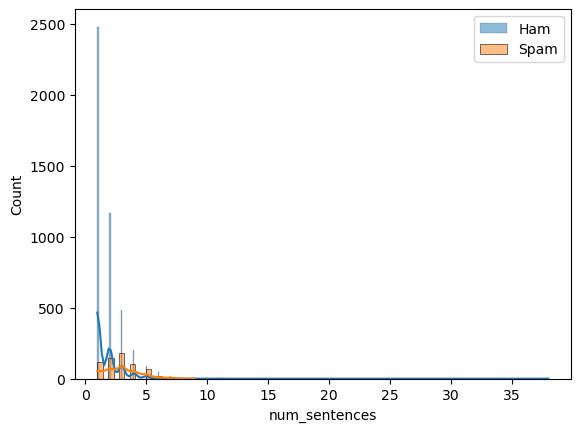

In [21]:
liste = ['num_characters', 'num_words', 'num_sentences']
for element in liste : 
    plt.figure()
    sns.histplot(data = df, x = df[element][df['target'] == 0], kde = True, label = 'Ham')
    sns.histplot(data = df, x = df[element][df['target'] == 1], kde = True, label = 'Spam')
    plt.legend()

On remarque qu'il y a bien une différence de distribution entre les différentes variables en fonction que le sms soit normal ou un spam.
Globalement un sms classé de spam contient + de mots, + de caractères (liés), et + de phrases 

In [22]:
df_numeric = df.select_dtypes(np.number)

<Axes: >

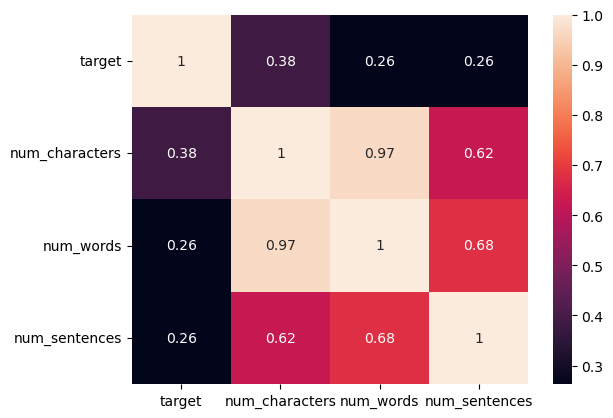

In [23]:
corr = df_numeric.corr()
sns.heatmap(corr, annot = True)

Grosse corrélation entre le nombre de caractères et le nombre de mots ce qui est logique. Il serait judicieux de garder une seule variable vu qu'ils sont très corrélés

## 4. Data Preprocessing 
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [24]:
from nltk.corpus import stopwords #Permet de récupérer les stopword qui sont mots courants dans une langue (comme "the", "is", "in" en anglais)
# Ils sont souvent supprimés car ils n'importent pas vraiment de valeur et de sens.
nltk.download('stopwords')
stopwords.words('english')
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fares\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
df['text'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [26]:
def transform_text(text) : 
    #Mettre le texte en minuscule 
    text = text.lower()
    #Récupérer la liste de mot du texte avec nltk word tokenize
    text = nltk.word_tokenize(text)

    y = []
    for t in text : 
        if t.isalnum() :  # On check si le mot est soit alphabetique, soit numerique
            y.append(t)
    text = y[:] # On garde tous les mots (sans les espaces)
    y.clear()
    #On regarde maintenant dans les mots récupérés si il y a des stopwords ou des ponctuations 
    for t in text :
        if t not in stopwords.words('english') and t not in string.punctuation : 
            y.append(t)
    text = y[:]
    y.clear()
    for t in text : 
        y.append(ps.stem(t)) # Stemming : mettre les mots dérivées sous leur forme de racine ( par exemple running, ran, runner --> run)

    return " ".join(y) #permet d'afficher notre liste de mots en une "phrase" en séparant les mots de la liste par un espace
        
        

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [28]:
df['transformed_text'] = df['text'].apply(transform_text) 

In [29]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


On peut s'intéresser à la fréquence des mots dans les sms 

In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [31]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) # concatène les différents mots en une longue phrase en spécifiant que ceux ci sont séparés par une virgule

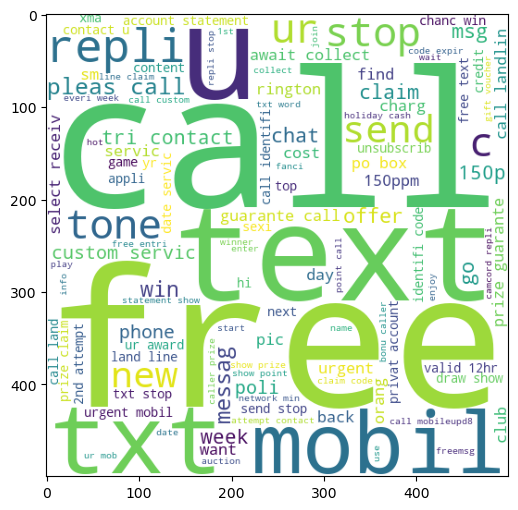

In [32]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

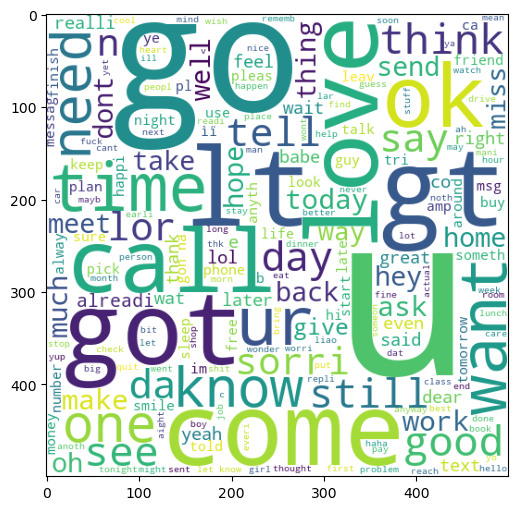

In [33]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) # concatène les différents mots en une longue phrase en spécifiant que ceux ci sont séparés par une virgule
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [34]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist() : 
    for words in msg.split() : 
        spam_corpus.append(words)

In [35]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist() : 
    for words in msg.split() : 
        ham_corpus.append(words)

**On peut visualiser les 30 mots les plus courants pour les spams et les non spams**


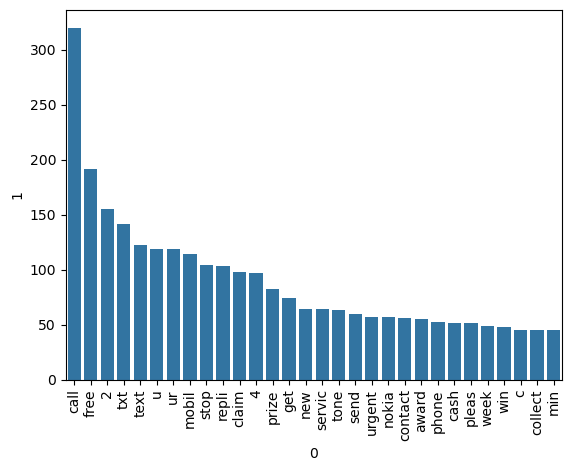

In [36]:
from collections import Counter # utilisée pour compter les occurrences des éléments dans un iterable (comme une liste de mots).
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

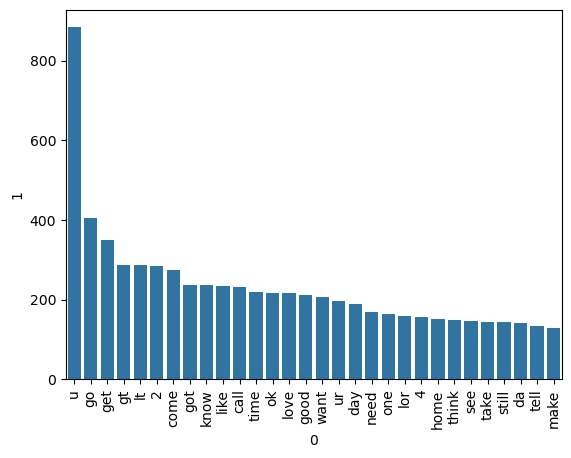

In [37]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 5. Model Building 

#### On Crée une matrice X contenant des données exploitables pour nos algorithmes

In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer() #Compte les occurences de chaque mot pour chaque document en les mettant sur une ligne de la matrice 
tfidf = TfidfVectorizer(max_features=3000) # TFID pour Term Frequency-Inverse Document Frequency. Il prend en plus l'inverse de la fréquence des documents dans 
#lequel le mot apparait, ce qui permet de réduire limportance des mots communs. Ici seuls les 3000 premiers mots sont pris en compte

In [39]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [41]:
X.shape #5169 documents (données) pour 3000 mots 

(5169, 3000)

In [43]:
y = df['target'].values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#### On teste d'abord si les approches naives et très basiques sont efficaces ou pas 

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# Gaussian bien pour des variables continues suivant une distribution normale
# Multinomial bien pour des variables discrètes (comme la fréquence d'un mot dans un texte)
# Bernoulli bien pour des variables binaires (0 ou 1) comme la présence ou pas d'un mot dans une phrase 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
models = [gnb, mnb, bnb]
for model in models : 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(precision_score(y_test, y_pred))



0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932
0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


le multinomial et le bernouilli semble être assez efficace 

#### Exploitons maintenant des modèles + sophistiqués

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [55]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [56]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [57]:
def train_model(model, X_train, y_train, X_test, y_test) : 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [58]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items() : 
    current_accuracy, current_precision = train_model(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For KN
Accuracy -  0.9052224371373307
Precision -  1.0
For NB
Accuracy -  0.9709864603481625
Precision -  1.0
For DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511
For LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\fares\anaconda3\envs\heartdesease\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213
